In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [2]:
data=pd.read_csv('train.csv')
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [4]:
print(data.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')


In [5]:
print(data.describe())

            Row ID   Postal Code         Sales
count  9800.000000   9789.000000   9800.000000
mean   4900.500000  55273.322403    230.769059
std    2829.160653  32041.223413    626.651875
min       1.000000   1040.000000      0.444000
25%    2450.750000  23223.000000     17.248000
50%    4900.500000  58103.000000     54.490000
75%    7350.250000  90008.000000    210.605000
max    9800.000000  99301.000000  22638.480000


In [6]:
print(data.isna().sum())

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


In [7]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [8]:
data["Order Date"] = pd.DatetimeIndex(data["Order Date"])
data["Ship Date"] = pd.DatetimeIndex(data["Ship Date"])

C:\Users\1310a\AppData\Local\Temp\ipykernel_17932\1430925613.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data["Order Date"] = pd.DatetimeIndex(data["Order Date"])
C:\Users\1310a\AppData\Local\Temp\ipykernel_17932\1430925613.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data["Ship Date"] = pd.DatetimeIndex(data["Ship Date"])


<Axes: xlabel='Segment', ylabel='Sales'>

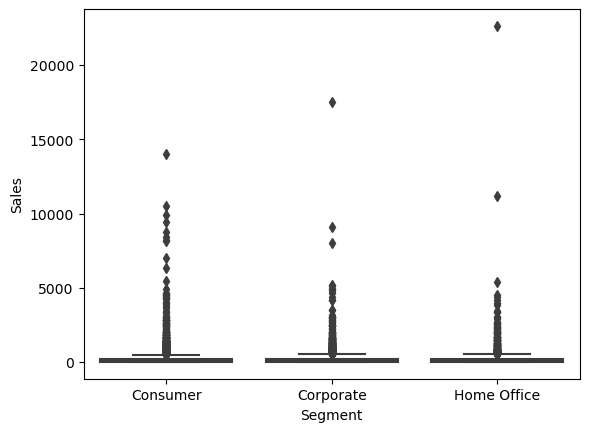

In [9]:
sns.boxplot(x="Segment",y="Sales",data=data)

<Axes: xlabel='Segment', ylabel='Sales'>

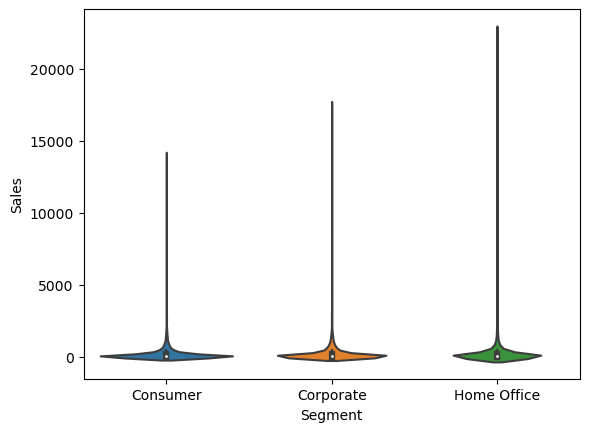

In [10]:
sns.violinplot(x="Segment",y="Sales",data=data)

In [11]:
data['Segment'].value_counts()

Consumer       5101
Corporate      2953
Home Office    1746
Name: Segment, dtype: int64

In [12]:
consumer=data[data['Segment']=='Consumer']
print(consumer)

      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
0          1  CA-2017-152156 2017-08-11 2017-11-11    Second Class   
1          2  CA-2017-152156 2017-08-11 2017-11-11    Second Class   
3          4  US-2016-108966 2016-11-10 2016-10-18  Standard Class   
4          5  US-2016-108966 2016-11-10 2016-10-18  Standard Class   
5          6  CA-2015-115812 2015-09-06 2015-06-14  Standard Class   
...      ...             ...        ...        ...             ...   
9790    9791  CA-2018-144491 2018-03-27 2018-01-04  Standard Class   
9791    9792  CA-2015-127166 2015-05-21 2015-05-23    Second Class   
9792    9793  CA-2015-127166 2015-05-21 2015-05-23    Second Class   
9793    9794  CA-2015-127166 2015-05-21 2015-05-23    Second Class   
9794    9795  CA-2015-127166 2015-05-21 2015-05-23    Second Class   

     Customer ID     Customer Name   Segment        Country             City  \
0       CG-12520       Claire Gute  Consumer  United States        Henderson   

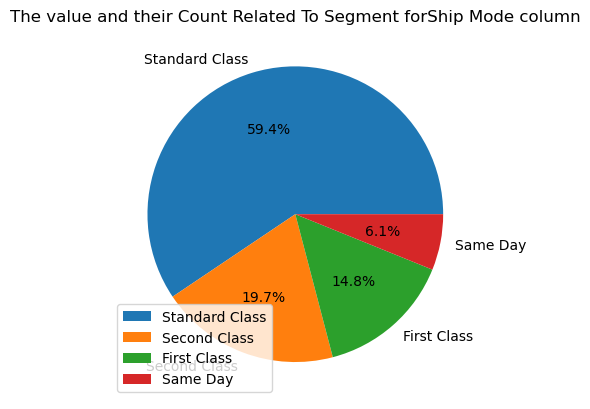

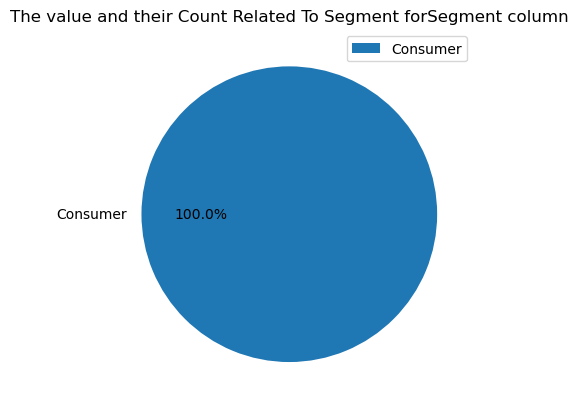

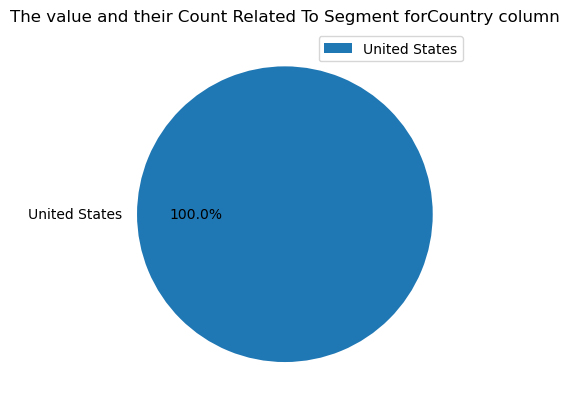

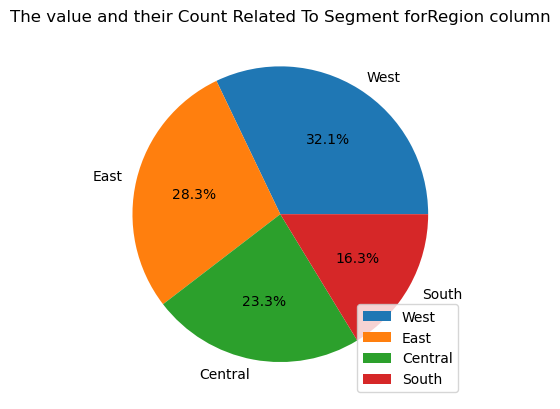

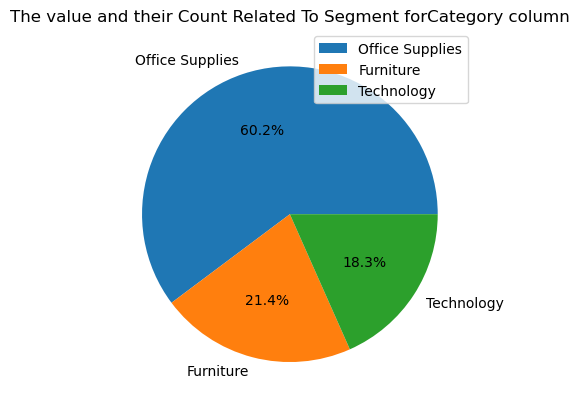

In [13]:
for i in consumer.columns.values:
    index=consumer[i].value_counts().index.values
    val=consumer[i].value_counts().values
    if(len(index) and len(val))<=10:
        plt.pie(val,labels=index,autopct='%1.1f%%')
        plt.title(f'The value and their Count Related To Segment for{i} column')
        plt.legend()
        plt.show()

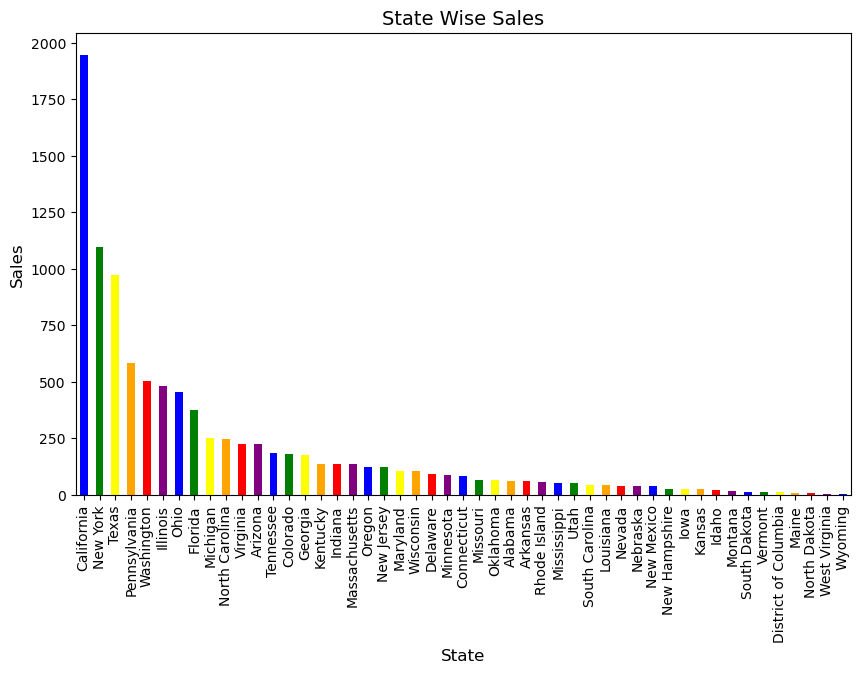

In [14]:
state_counts = data['State'].value_counts()
colors = ['blue', 'green','yellow', 'orange', 'red', 'purple']
plt.figure(figsize=(10, 6))
state_counts.plot(kind='bar', color=colors)
plt.xlabel('State', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.title('State Wise Sales', fontsize=14)
plt.show()

In [15]:
def check(data):
    l=[]
    columns=data.columns
    for col in columns:
        dtypes=data[col].dtypes
        nunique=data[col].nunique()
        sum_null=data[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    data_check=pd.DataFrame(l)
    data_check.columns=['column','dtypes','nunique','sum_null']
    return data_check 
check(data)

,column,dtypes,nunique,sum_null
0,Row ID,int64,9800,0
1,Order ID,object,4922,0
2,Order Date,datetime64[ns],1230,0
3,Ship Date,datetime64[ns],1326,0
4,Ship Mode,object,4,0
5,Customer ID,object,793,0
6,Customer Name,object,793,0
7,Segment,object,3,0
8,Country,object,1,0
9,City,object,529,0


In [16]:
#Burlington city Postal Code is 27219
data["Postal Code"]=data["Postal Code"].fillna(27219.0)

In [17]:
# create additional column of day, month and year
data['Year'] = pd.DatetimeIndex(data['Order Date']).year
data['Month'] = pd.DatetimeIndex(data['Order Date']).month
data['Day'] = pd.DatetimeIndex(data['Order Date']).day

In [18]:
#where '%A' is a format code that represents the full name of the day of the week (e.g., Monday, Tuesday, etc.).
data['Day of Week'] = data['Order Date'].dt.strftime('%A')
print(data['Day of Week'])

0          Friday
1          Friday
2       Wednesday
3        Thursday
4        Thursday
          ...    
9795       Sunday
9796     Thursday
9797     Thursday
9798     Thursday
9799     Thursday
Name: Day of Week, Length: 9800, dtype: object


In [19]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Year,Month,Day,Day of Week
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,8,11,Friday
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,8,11,Friday
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,12,6,Wednesday
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,11,10,Thursday
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,11,10,Thursday


array([[<Axes: title={'center': 'Order Date'}>,
        <Axes: title={'center': 'Ship Date'}>],
       [<Axes: title={'center': 'Sales'}>,
        <Axes: title={'center': 'Year'}>],
       [<Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Day'}>]], dtype=object)

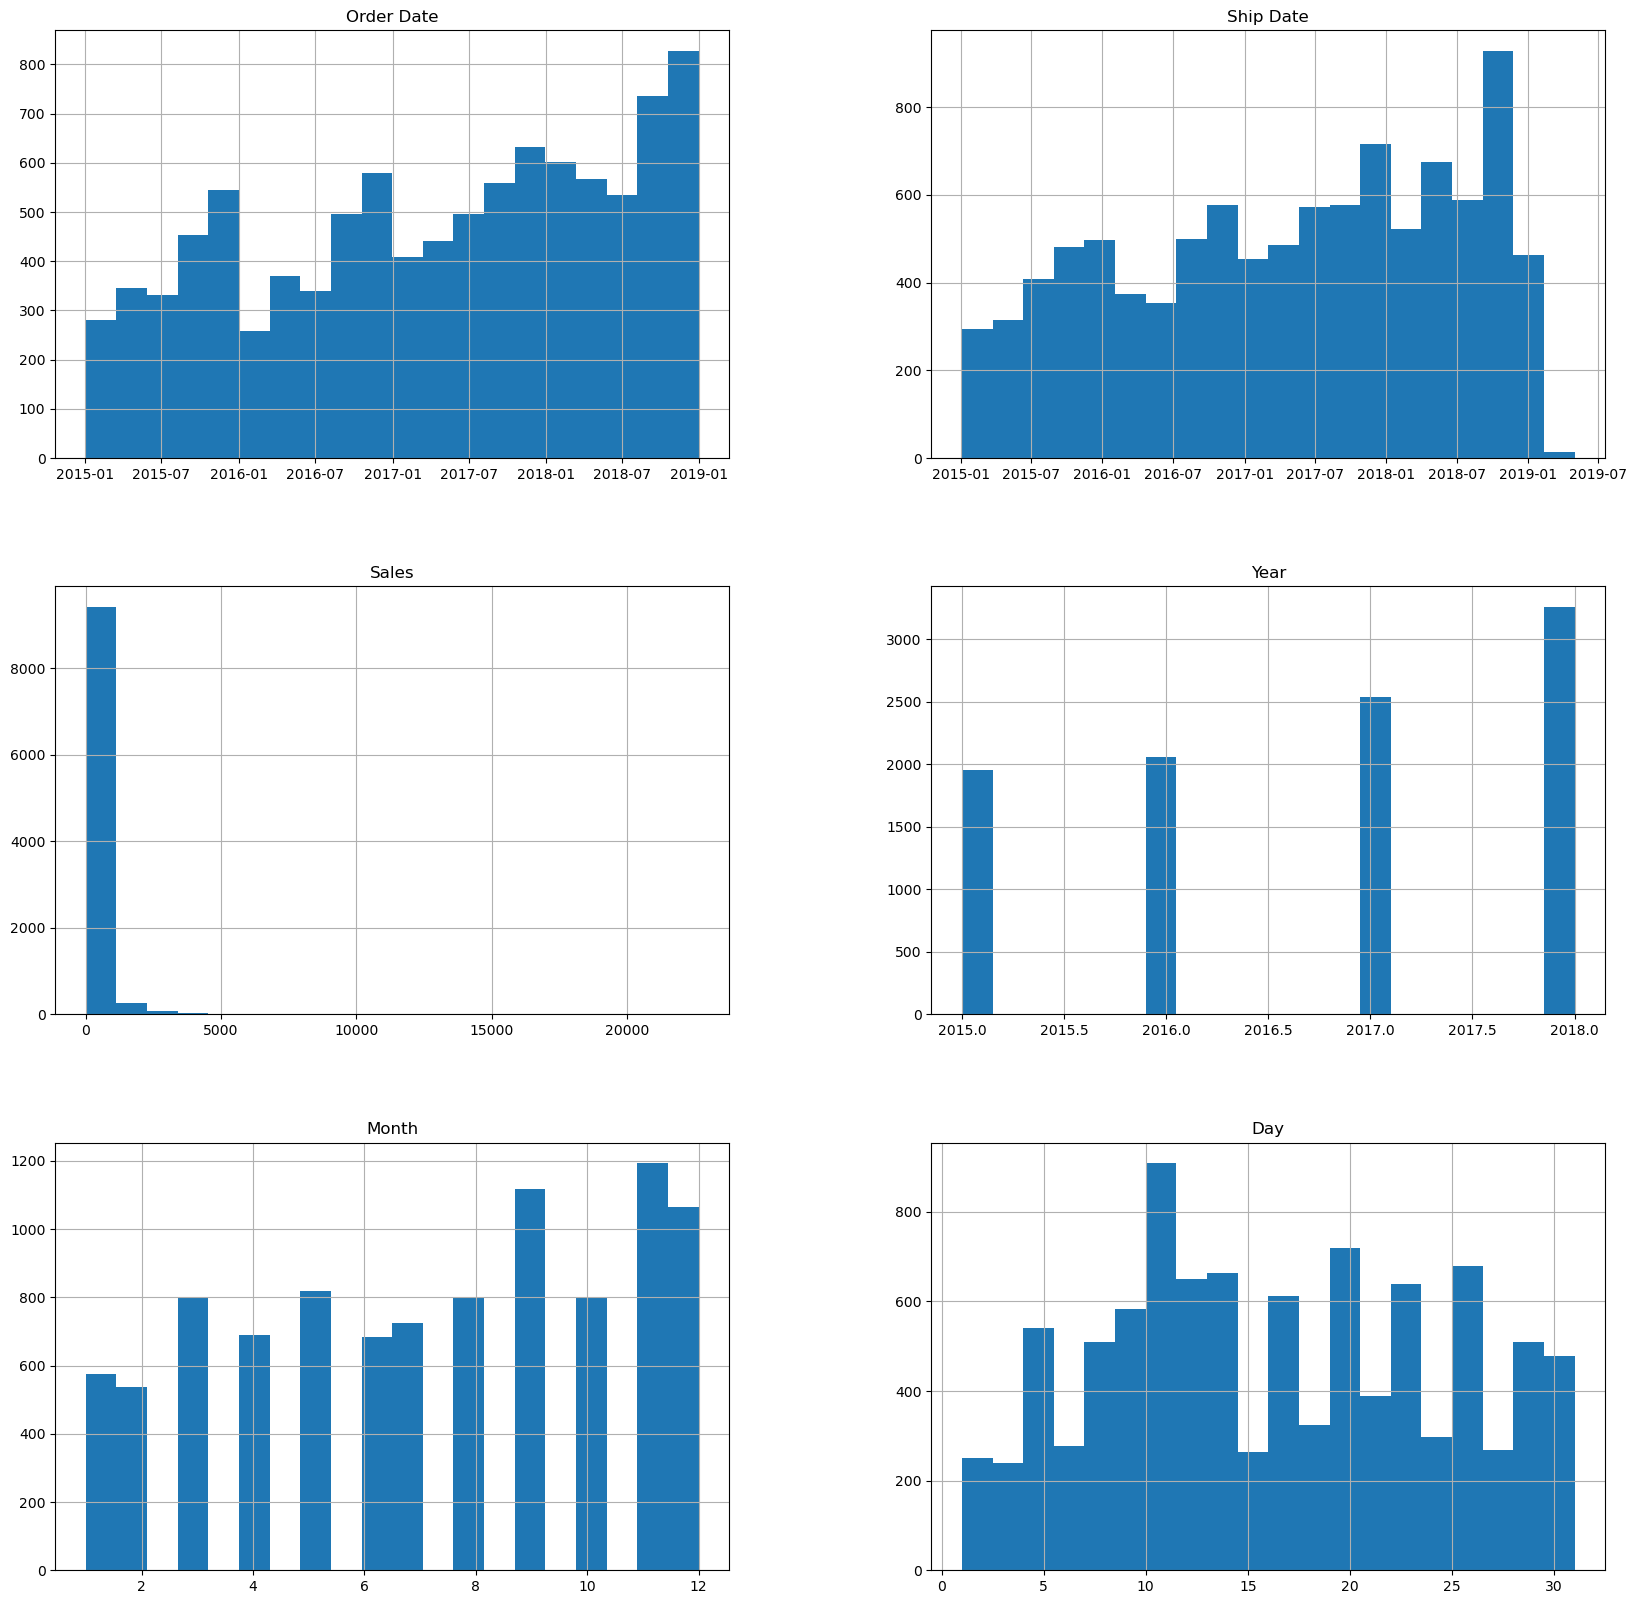

In [22]:
data[['Order Date' , 'Ship Date' , 'Sales' , 'Year', 'Month', 'Day']].hist(bins=20 ,figsize = (20,20))

C:\Users\1310a\AppData\Local\Temp\ipykernel_17932\1830512324.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Month'])


Text(0.5, 1.0, 'Month Histogram')

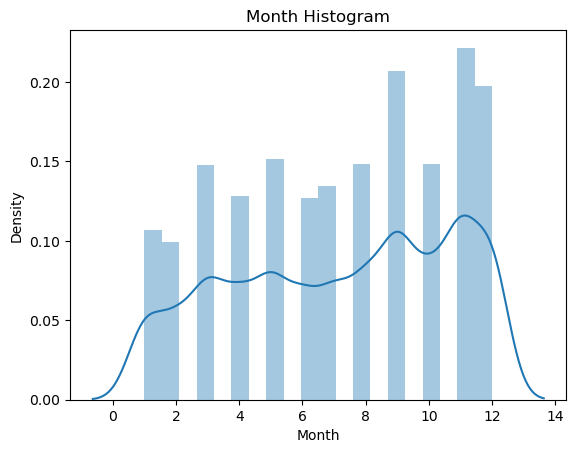

In [24]:
sns.distplot(data['Month'])
plt.title('Month Histogram')

In [34]:
best_customer = data.pivot_table(values = "Sales" , index = "Customer Name" , aggfunc = "sum")
best_customer = best_customer.sort_values(by=['Sales'], ascending=False).head(15)
best_customer.reset_index(inplace=True) # we will have to reset the index to add the customer name into dataframe 
best_customer['Sales']=best_customer['Sales'].round(2)
best_customer

,Customer Name,Sales
0,Sean Miller,25043.05
1,Tamara Chand,19052.22
2,Raymond Buch,15117.34
3,Tom Ashbrook,14595.62
4,Adrian Barton,14473.57
5,Ken Lonsdale,14175.23
6,Sanjit Chand,14142.33
7,Hunter Lopez,12873.30
8,Sanjit Engle,12209.44
9,Christopher Conant,12129.07


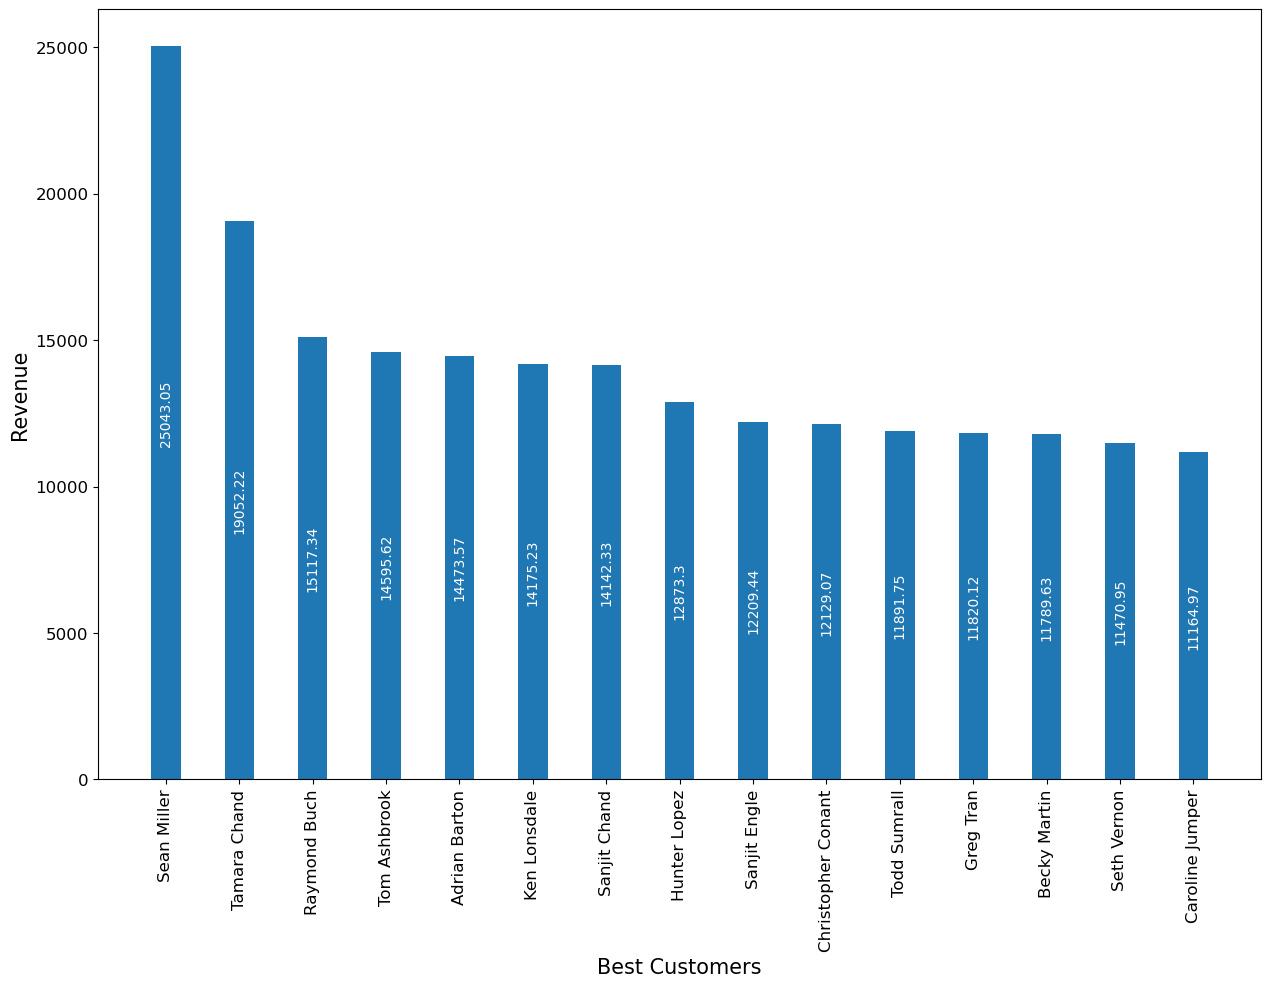

In [38]:
fig = plt.figure(figsize = (15, 10))
 
# creating the bar plot
plt.bar(best_customer['Customer Name'],best_customer['Sales'] ,width = 0.4)
 
plt.xlabel("Best Customers",fontsize=15)
plt.ylabel("Revenue",fontsize=15)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)

for i , v in enumerate(best_customer['Sales']):
    plt.text(i, v/2 , str(v) , ha='center' , va='center' , rotation=90 , color='white')
plt.show()


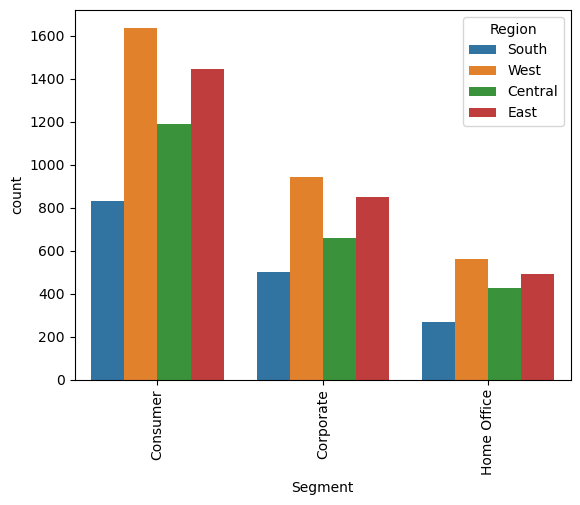

In [41]:
sns.countplot(data=data,x="Segment",hue='Region')
plt.xticks(rotation=90)
plt.show()

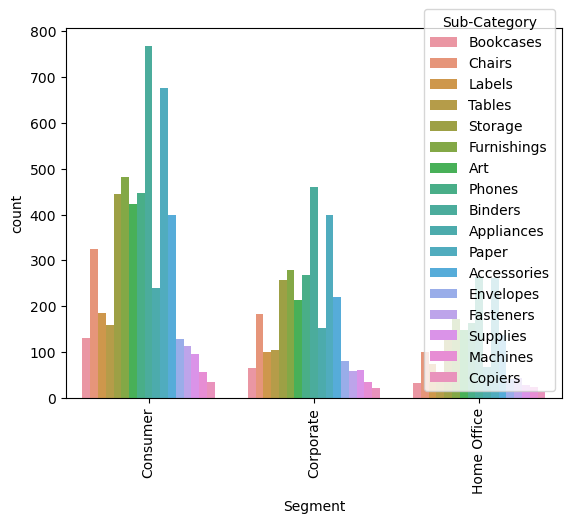

In [43]:
sns.countplot(data=data,x="Segment",hue='Sub-Category')
plt.xticks(rotation=90)
plt.show()

<Figure size 640x480 with 0 Axes>

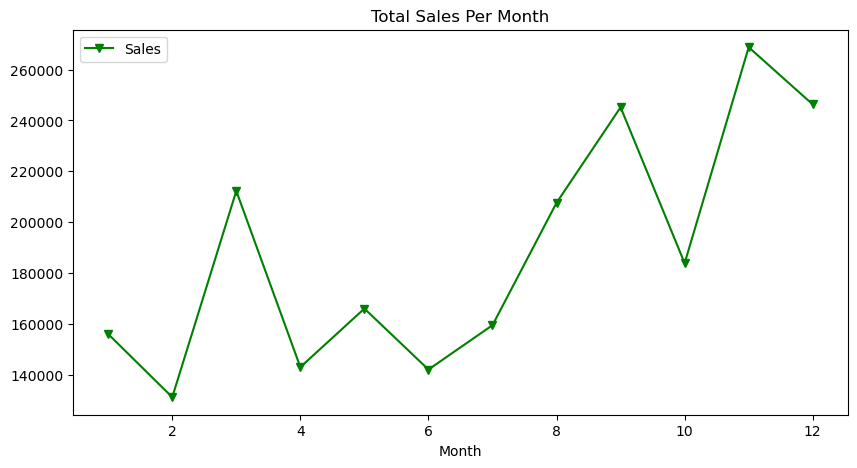

<Figure size 640x480 with 0 Axes>

In [46]:
axis = data.groupby('Month')[['Sales']].sum().plot(figsize = (10,5), marker = 'v', color = 'g')
axis.set_title('Total Sales Per Month')

plt.figure()

<Figure size 640x480 with 0 Axes>

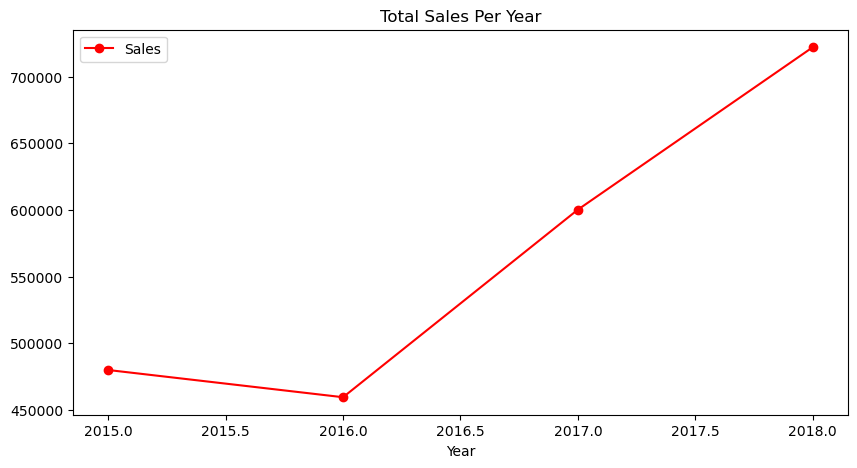

<Figure size 640x480 with 0 Axes>

In [50]:
axis = data.groupby('Year')[['Sales']].sum().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Total Sales Per Year')

plt.figure()

<Figure size 640x480 with 0 Axes>

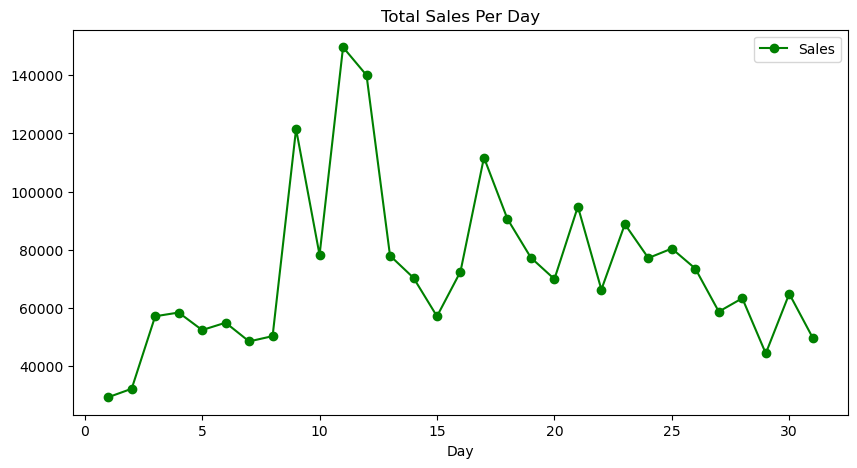

<Figure size 640x480 with 0 Axes>

In [52]:
axis = data.groupby('Day')[['Sales']].sum().plot(figsize = (10,5), marker = 'o', color = 'g')
axis.set_title('Total Sales Per Day')

plt.figure()